# Plots of the article showing method and solutions

In [1]:
using DataFrames , CSV , Statistics, Query
using Printf
using PyCall, Random
using LaTeXStrings

import PyPlot

patch= pyimport("matplotlib.patches")

## directory
rootdir = ENV["GAIA_ROOT"]
wdir    = "$rootdir/products"
plotdir = "$rootdir/article"

cd(wdir)

### ABC solutions

In [2]:
mcfull1 = CSV.read("votlist.mcmc.full.csv.clean", delim = ";")
mcfull2 = CSV.read("votlist.mcmc.full.2.csv.clean", delim = ";")
mc  = vcat(mcfull1, mcfull2)


,votname,epsm,epsd,mneim,mneid,mclm,mcld
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,AH03 J0822-36.4-1.0deg.vot,5.11061,0.991445,6.07892,4.06543,17.7306,6.1372
2,Alessi 1-2.1deg.vot,1.96993,0.511145,6.90043,4.17191,16.2051,6.02901
3,Alessi 12-2.4deg.vot,2.02499,0.499447,7.44922,4.41792,17.6467,6.81384
4,Alessi 13-15.9deg.vot,1.97032,0.374212,7.98801,4.53389,17.9001,6.80905
5,Alessi 19-2.4deg.vot,4.97887,1.02761,7.08125,4.59681,21.9058,5.68553
6,Alessi 20-1.5deg.vot,1.89006,0.438416,7.57542,4.60663,17.1788,6.73766
7,Alessi 21-1.6deg.vot,2.10974,0.486757,7.18482,4.23338,17.0073,6.27999
8,Alessi 2-1.7deg.vot,2.25757,0.639092,7.8365,4.67522,17.8685,7.10634
9,Alessi 3-2.2deg.vot,1.70176,0.397934,7.92874,4.6728,17.7203,6.38789


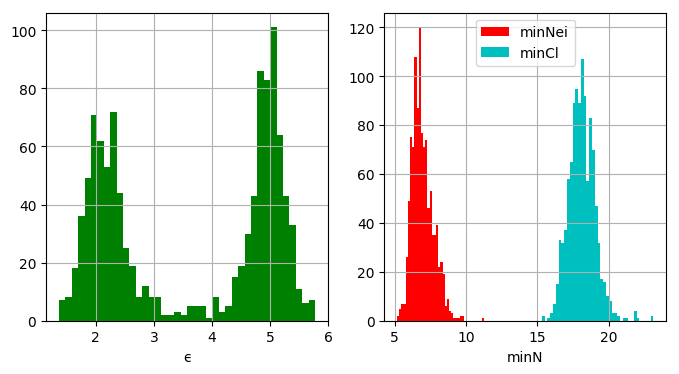

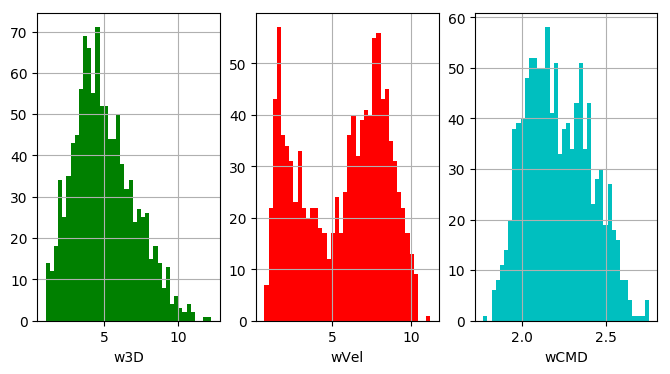

In [3]:
### plot ABC solution distributions

fig= PyPlot.figure(figsize=(8,4))

ax= PyPlot.subplot(121)
PyPlot.grid("on")
PyPlot.hist(mc.epsm , 40, density=false, facecolor="g", label="ϵ")
PyPlot.xlabel("ϵ")

ax= PyPlot.subplot(122)
PyPlot.grid("on")
PyPlot.hist(mc.mneim , 40, density=false, facecolor="r", label="minNei")
PyPlot.hist(mc.mclm , 40, density=false, facecolor="c", label="minCl")
PyPlot.legend()
PyPlot.xlabel("minN")

filename= plotdir*"/dbscan-solution-distribution.eps"
PyPlot.savefig(filename)
PyPlot.show()



fig= PyPlot.figure(figsize=(8,4))

ax= PyPlot.subplot(131)
PyPlot.grid("on")
PyPlot.hist(mc.w3dm , 40, density=false, facecolor="g", label="w3d")
PyPlot.xlabel("w3D")

ax= PyPlot.subplot(132)
PyPlot.grid("on")
PyPlot.hist(mc.wvelm , 40, density=false, facecolor="r", label="wvel")
PyPlot.xlabel("wVel")

ax= PyPlot.subplot(133)
PyPlot.grid("on")
PyPlot.hist(mc.whrdm , 40, density=false, facecolor="c", label="wvel")
PyPlot.xlabel("wCMD")

filename= plotdir*"/weighting-solution-distribution.eps"
PyPlot.savefig(filename)
PyPlot.show()


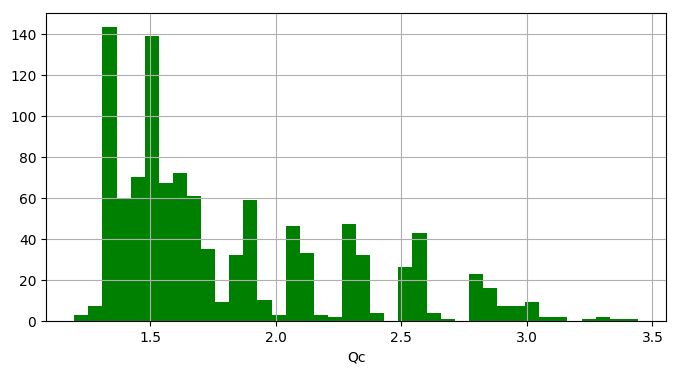

In [4]:
## Qc distribution

fig= PyPlot.figure(figsize=(8,4))

ax= PyPlot.subplot(111)
PyPlot.grid("on")
PyPlot.hist(mc.qcm , 40, density=false, facecolor="g", label="qc")
PyPlot.xlabel("Qc")

filename= plotdir*"/Qc-distribution.eps"
PyPlot.savefig(filename)
PyPlot.show()

## Metrics

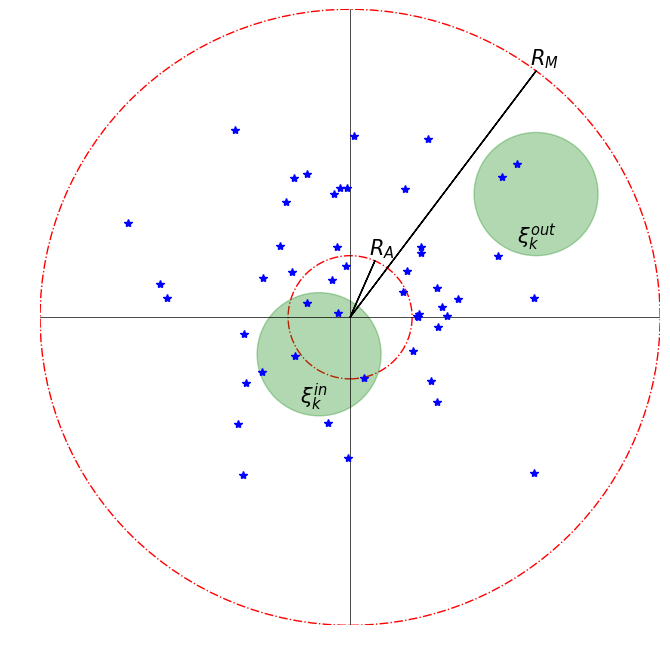

## Qc definition...


In [39]:
## Qc definition
println("## Qc definition...")
Random.seed!(12344)

fig= PyPlot.figure(figsize=(8,8))

ax= PyPlot.subplot(111)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.axis("off")

aper= patch.Circle((0,0), 1., edgecolor="r",linestyle="-.",fill=false)
ax.add_artist(aper)
outarea= patch.Circle((0,0), 5., edgecolor="r",linestyle="-.",fill=false)
ax.add_artist(outarea)
PyPlot.plot((-5,5),(0,0),"k-",linewidth=0.5)
PyPlot.plot((0,0),(-5,5),"k-",linewidth=0.5)


#test area i : out
outi= patch.Circle((3,2), 1., facecolor="g" , edgecolor="g", alpha=0.3,linestyle="-",fill=true)
ax.add_artist(outi)
#test area i : in
ini= patch.Circle((-0.5,-0.6), 1., facecolor= "g", edgecolor="g",alpha=0.3,linestyle="-",fill=true)
ax.add_artist(ini)


# Draw a cluster example
xs= 1.5*randn(Float64, 50)
ys= 1.5*randn(Float64, 50)
PyPlot.plot(xs,ys,"b*")

## symbol
PyPlot.text(2.7,1.2,L"\xi_{k}^{out}", size=15)
PyPlot.text(-0.8,-1.4,L"\xi_{k}^{in}", size=15)

PyPlot.text(0.4-0.1,sqrt(1-0.4^2)+0.1,L"R_A", size=15)
PyPlot.text(3.0-0.1,sqrt(5^2-3^2)+0.1,L"R_M", size=15)

#Radii
PyPlot.arrow(0,0, 0.4,sqrt(1-0.4^2))
PyPlot.arrow(0,0, 3.0,sqrt(5^2-3.0^2), shape="full")

filename= plotdir*"/Qc-method.eps"
PyPlot.savefig(filename)
PyPlot.show()